## DL2 - Question 1
#### Plot the loss and accuracy for both training data and validation datausing the history object in the source code (https://umkc.box.com/s/10nrlk6216fncengv7qxbbw5o9vgc3hs

In [1]:
# Importing the libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

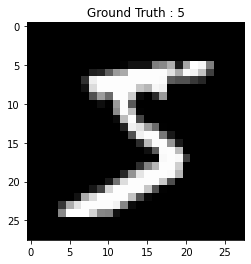

In [3]:
#loading the train and test data 
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [5]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0

In [6]:
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 17s 74ms/step - loss: 0.2690 - accuracy: 0.9173 - val_loss: 0.1416 - val_accuracy: 0.9580
Epoch 2/20
235/235 [==============================] - 17s 73ms/step - loss: 0.0926 - accuracy: 0.9708 - val_loss: 0.1279 - val_accuracy: 0.9607
Epoch 3/20
235/235 [==============================] - 15s 65ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0798 - val_accuracy: 0.9756
Epoch 4/20
235/235 [==============================] - 15s 66ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0740 - val_accuracy: 0.9785
Epoch 5/20
235/235 [==============================] - 15s 66ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0682 - val_accuracy: 0.9826
Epoch 6/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0848 - val_accuracy: 0.9761
Epoch 7/20
235/235 [==============================] - 17s 70ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0816 - val_accuracy:

In [9]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.1244 - accuracy: 0.9835
Evaluation result on Test Data : Loss = 0.1244332417845726, accuracy = 0.9835000038146973


In [20]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

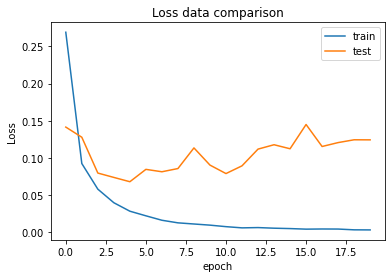

In [22]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
Loss of the model is around 12-13 %

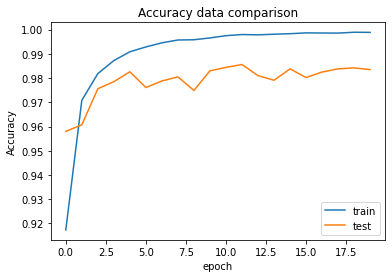

In [23]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations :
Accuracy of the model is around 98 %